# Softmax Tutorial

First we import the needed libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse

Next we import the MNIST data files we are going to be classifying. This database contains images of thousands of handwritten digits, and their proper labels. For convenience I am using a script from Google, which can be download [here](https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py). Just add it to your working directory, and it will download the MNIST database for you. We are going to use 500 training examples, and 100 test examples.

In [4]:
trainingFaces = np.load("mnist_train_images.npy")
trainingLabels = np.load("mnist_train_labels.npy")
testingFaces = np.load("mnist_test_images.npy")
testingLabels = np.load("mnist_test_labels.npy")

Let's take a look at one of the images in the set. Looks like a 4!

Now we set the loaded data as our x and y variables for both the train and test sets.

In [5]:
y = trainingLabels
x = trainingFaces
testY = testingLabels
testX = testingFaces

### Before we can get to training our model using the data, we will have to define a few functions that the training and testing process can use.

Here we define the loss function for softmax regression.

In [25]:
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    #y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    #loss = (-1 / m) * np.sum(y*np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    #grad = (-1 / m) * np.dot(x.T,(y - prob)) + lam*w #And compute the gradient for that loss
    loss = (-1 / m) * np.sum(y*np.log(prob))  #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y - prob))  #And compute the gradient for that loss
    return loss,grad

In [29]:
softmax(np.dot(x,w)).shape

(55000, 10)

The below function converts integer class coding, where there is a unidimensional array of labels into a one-hot varient, where the array is size m (examples) x n (classes).

In [7]:
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

Here we perform the softmax transformation:
This allows us to get probabilities for each class score that sum to 100%.


<img src="https://upload.wikimedia.org/math/0/9/9/0991837b7d5a522ebc156f51dadbed0e.png">

In [8]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

Here we determine the probabilities and predictions for each class when given a set of input data:

In [9]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

### This is the main loop of the softmax regression. 
Here we initialize our weights, regularization factor, number of iterations, and learning rate. We then loop over a computation of the loss and gradient, and application of gradient.

In [28]:
w = np.zeros([x.shape[1],y.shape[1]])
lam = 1
iterations = 1000
learningRate = 1e-5
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
    print loss

126642.18011467239
98696.74888495645
80701.00683147857
69099.0116575261
61374.22617647259
55757.08825233743
51819.33804878814
48469.5648822138
46137.33900644015
43709.96106357783
42031.669286793476
40245.42767561912
38921.14265191166
37626.882271438226
36577.727175888125
35618.625720088356
34791.70756816866
34048.86102731476
33385.24315191282
32783.38527948894
32234.376416595132
31729.832171290214
31263.73333194436
30831.206580853916
30428.353349391047
30051.93348552164
29699.213259925138
29367.847373827346
29055.805117114796
28761.314240173266
28482.81954909281
28218.949567228123
27968.489735042116
27730.360212193566
27503.59744605978
27287.33870225086
27080.8090287242
26883.310205779326
26694.21133870227
26512.94081235573
26338.9793823226
26171.85421848538
26011.1337505449
25856.423191595524
25707.360637369147
25563.61365611412
25424.876298187133
25290.866465958068
25161.32359408085
25036.00659797237
24914.692054786745
24797.172586526576
24683.255419398258
24572.761097256298
24465.52

17291.87197897889
17287.48434937212
17283.11116707588
17278.752350464416
17274.407818554184
17270.07749099738
17265.761288075595
17261.45913069343
17257.170940372314
17252.89663924429
17248.636150045964
17244.38939611248
17240.156301371542
17235.936790337644
17231.730788106157
17227.538220347647
17223.359013302255
17219.19309377406
17215.04038912556
17210.900827272235
17206.774336677132
17202.66084634555
17198.56028581976
17194.472585173862
17190.39767500856
17186.335486446118
17182.28595112539
17178.249001196746
17174.2245693173
17170.212588645958
17166.21299283871
17162.22571604383
17158.250692897273
17154.287858517946
17150.33714850326
17146.398498924536
17142.471846322554
17138.557127703152
17134.654280532857
17130.763242734567
17126.88395268332
17123.016349202007
17119.160371557296
17115.315959455464
17111.483053038315
17107.661592879154
17103.851519978867
17100.052775761917
17096.265302072465
17092.489041170553
17088.723935728267
17084.96992882597
17081.226963948644
17077.4949849

16135.9210152899
16134.277211380679
16132.635975193489
16130.997299504385
16129.361177118302
16127.727600868928
16126.09656361856
16124.46805825796
16122.842077706197
16121.218614910495
16119.59766284613
16117.979214516243
16116.363262951716
16114.749801211028
16113.138822380131
16111.530319572279
16109.924285927918
16108.320714614543
16106.719598826545
16105.120931785077
16103.52470673795
16101.930916959473
16100.339555750315
16098.750616437372
16097.16409237368
16095.579976938194
16093.998263535768
16092.418945596928
16090.842016577799
16089.267469959967
16087.695299250354
16086.125497981062
16084.558059709301
16082.992978017208
16081.430246511765
16079.869858824643
16078.311808612143
16076.756089554958
16075.20269535818
16073.651619751083
16072.102856487074
16070.556399343515
16069.012242121647
16067.470378646463
16065.930802766557
16064.393508354075
16062.858489304515
16061.325739536718
16059.795252992642
16058.267023637318
16056.741045458733
16055.217312467705
16053.695818697734
1

We can look at how the loss (hopefully) decreases over time.

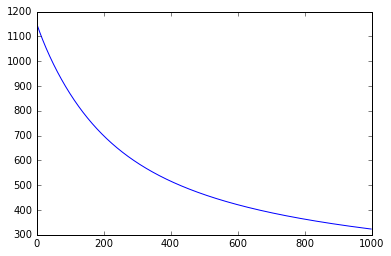

In [12]:
plt.plot(losses)

### Now that we have trained our model, we can see how well it is able to perform on both the training and test sets:

In [22]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [23]:
print 'Training Accuracy: ', getAccuracy(x,y)
print 'Test Accuracy: ', getAccuracy(testX,testY)

Training Accuracy:  0.902
Test Accuracy:  0.85


### One of the benefits of a simple model like softmax is that we can visualize the weights for each of the classes, and see what it prefers. Here we look at the weights for the '3' class.

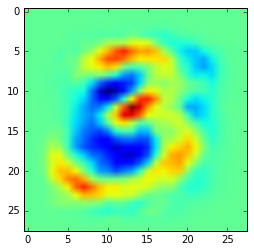

In [27]:
classWeightsToVisualize = 3
plt.imshow(scipy.reshape(w[:,classWeightsToVisualize],[28,28]))